# <font color = "pink"> 1. Introduction</font>

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:
    1. Define the question, the metric for success, the context, experimental design taken and the                    appropriateness of the available data to answer the given question
    2. Find and deal with outliers, anomalies, and missing data within the dataset.
    3. Perform univariate, bivariate and multivariate analysis recording your observations.
    4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component          analysis, and discriminant analysis.
    5. Challenge your solution by providing insights on how you can make improvements.

#### 1.1 Research Question

What factors (e.g. cell phone access, location, age, gender, job type, education level, relationship with head of household, marital status) influence whether or not an individual has a bank account?

#### 1.2 Metric for Success

#### 1.3 Context

#### 1.4 Experimental Design

#### 1.5 Appropriateness of Data

# 2. Data Preparation

#### 2.1 Load Python libraries and the dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
financial = pd.read_csv('Financial Dataset - 1 (2).csv')
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#### 2.2 Preview the dataset and gather basic info about it

In [3]:
# provide summary statistics
financial.describe(include='all').transpose() # transposing makes the data easier to see

## latest year is 2056? Look into this
## a minimum household size of 0? That's odd

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23510,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524,NaN,NaN,NaN,2016.98,0.899669,2016,2016,2017,2018,2056
uniqueid,23524,8735,uniqueid_835,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a Bank account,23488,2,No,20179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Location,23509,2,Rural,14338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cell Phone Access,23513,2,Yes,17449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23496,NaN,NaN,NaN,3.68182,2.27993,0,2,3,5,21
Respondent Age,23490,NaN,NaN,NaN,38.8043,16.52,16,26,35,49,100
gender_of_respondent,23490,2,Female,13859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The relathip with head,23520,6,Head of Household,12829,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check that the columns have their corresponding data types
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [9]:
# check the shape of the dataset
financial.shape

## 23,524 rows/records and 13 columns

(23524, 13)

In [47]:
# count the number of non-missing values in each column
financial.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

# 3.Data Cleaning

#### 3.1 Columns

In [10]:
# rename columns to improve consistency
financial = financial.rename(columns = {
    'uniqueid' : 'unique_id',
    'Has a Bank account' : 'bank_account',
    'Type of Location' : 'location_type',
    'Cell Phone Access' : 'cell_phone_access',
    'Respondent Age' : 'respondent_age',
    'gender_of_respondent' : 'respondent_gender',
    'The relathip with head' : 'rship_w_head',
    'Level of Educuation' : 'education_level',
    'Type of Job' : 'job_type'
})

financial.columns

Index(['country', 'year', 'unique_id', 'bank_account', 'location_type',
       'cell_phone_access', 'household_size', 'respondent_age',
       'respondent_gender', 'rship_w_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [113]:
# save this dataset so as to use it as a checkpoint in case of irreversible errors
financial.to_csv('financial_dataset.csv', index=False)

#### 3.2 Duplicates

In [162]:
# check for and display duplicates
duplicatedData = financial[financial.duplicated()]
duplicatedData

## no duplicated data found

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type


In [160]:
# reload dataset to last saved checkpoint when needed
financial = pd.read_csv('financial_dataset.csv')
financial.head()

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#### 3.3 Null values

In [163]:
# total number of missing values
np.count_nonzero(financial.isna())

## we have 267 missing values

267

In [164]:
# look for where exactly the missing values are
financial.isna().sum()

country              14
year                  0
unique_id             0
bank_account         36
location_type        15
cell_phone_access    11
household_size       28
respondent_age       34
respondent_gender    34
rship_w_head          4
marital_status       32
education_level      29
job_type             30
dtype: int64

##### 3.3.1 Handling null values in 'country' column

In [165]:
# investigate the missing values in the 'country' column
countries = financial.loc[financial['country'].isna() == True]

# get the number of missing values 
print(countries.shape[0], "missing values")

# preview the dataset
countries

## we see that the missing 'country' values seem to be in index range 18200 to 18316
## since the entire dataset seems to be arranged first by index number then by country, we can assume
## that these missing values all are the country.

## so, we get the country before and after this dataset


14 missing values


,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
18201,NaN,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female,Head of Household,Widowed,Primary education,Self employed
18202,NaN,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female,Spouse,Single/Never Married,Primary education,No Income
18203,NaN,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female,Head of Household,Widowed,No formal education,Self employed
18204,NaN,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female,Head of Household,Widowed,No formal education,Self employed
18205,NaN,2017,uniqueid_3403,No,Rural,No,3.0,18.0,Male,Child,Divorced/Seperated,Secondary education,Remittance Dependent
18206,NaN,2017,uniqueid_3404,No,Urban,Yes,2.0,73.0,Female,Head of Household,Married/Living together,No formal education,Self employed
18207,NaN,2017,uniqueid_3405,No,Urban,No,1.0,40.0,Male,Head of Household,Widowed,No formal education,Self employed
18208,NaN,2017,uniqueid_3406,No,Urban,No,3.0,28.0,Male,Parent,Married/Living together,No formal education,Self employed
18312,NaN,2017,uniqueid_3510,No,Urban,No,2.0,19.0,Male,Parent,Divorced/Seperated,Secondary education,No Income


In [166]:
# examine the record above the dataset
financial.loc[financial['unique_id'] == 'uniqueid_3397']
## we see that Tanzania has a unique ID of 3397 and is in index number 18199, which is directly above
## the first record of the dataset containing the missing country.

# examine the record below the dataset
financial.loc[financial['unique_id'] == 'uniqueid_3515']
## we see that Tanzania has a unique ID of 3515 and is in index number 18317, which is directly below
## the last record of the dataset containing the missing country.


,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
3514,Kenya,2018,uniqueid_3515,No,Urban,No,3.0,17.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
9582,Rwanda,2016,uniqueid_3515,No,Rural,Yes,1.0,68.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing
18317,Tanzania,2017,uniqueid_3515,No,Urban,Yes,2.0,27.0,Female,Child,Divorced/Seperated,No formal education,Informally employed


In [167]:
## therefore, to deal with these null values, it would make sense to replace them with "Tanzania".
## for this, we will use the "fill forward" method

financial.country.fillna(method='ffill', inplace=True)

## hence, we have taken care of the missing values in the 'country' column

In [177]:
# confirm that the 'country' column does not have any missing values
np.count_nonzero(financial.country.isna())

## there are no more null values in the 'country' column

0

##### 3.3.2 Handling null values in 'bank_account' column

In [38]:
bank_acc = financial.loc[financial['bank_account'].isna() == True]
bank_acc

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
16948,Tanzania,2017,uniqueid_2146,NaN,NaN,NaN,1.0,65.0,Female,Head of Household,Married/Living together,Primary education,Informally employed
16949,Tanzania,2017,uniqueid_2147,NaN,NaN,NaN,2.0,27.0,Male,Other relative,Divorced/Seperated,Tertiary education,Informally employed
16950,Tanzania,2017,uniqueid_2148,NaN,NaN,NaN,1.0,36.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
16951,Tanzania,2017,uniqueid_2149,NaN,NaN,NaN,2.0,30.0,Female,Spouse,Single/Never Married,No formal education,Informally employed
18082,Tanzania,2017,uniqueid_3280,NaN,NaN,NaN,2.0,32.0,Female,Spouse,Single/Never Married,Primary education,Self employed
18083,Tanzania,2017,uniqueid_3281,NaN,NaN,NaN,1.0,31.0,Female,Head of Household,Widowed,Primary education,Self employed
18084,Tanzania,2017,uniqueid_3282,NaN,NaN,NaN,2.0,30.0,Female,Spouse,Single/Never Married,Primary education,Self employed
18085,Tanzania,2017,uniqueid_3283,NaN,NaN,NaN,2.0,23.0,Female,Parent,Single/Never Married,Primary education,Self employed
18779,Tanzania,2017,uniqueid_3977,NaN,Urban,Yes,1.0,50.0,Female,Head of Household,Widowed,No formal education,Self employed
18780,Tanzania,2017,uniqueid_3978,NaN,Urban,No,2.0,44.0,Female,Spouse,Single/Never Married,No formal education,Self employed


# 4. Data Analysis

## 4.1 Univariate Analysis

In [41]:
# compare number of male respondents to that of female respondents
financial.respondent_gender.value_counts()

Female    13859
Male       9631
Name: respondent_gender, dtype: int64


# <font color = "pink"> Kamau Analysis</font>

# Univariate Analysis

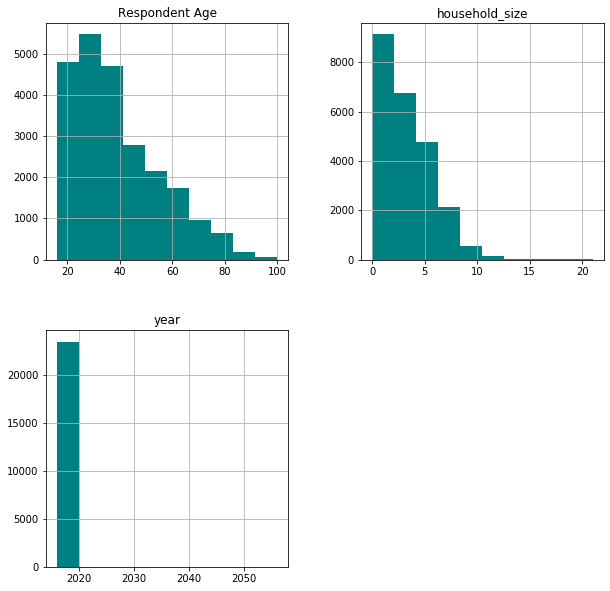

In [66]:
# select all the numeric columns and plot the histograms
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = financial.select_dtypes(include=numerics)
newdf.hist(figsize = (10,10),color = "teal") # creates a plot for all numeric columns , the figsize argument is for changing sizes of hists


newdf.head()
newdf = newdf.dropna()


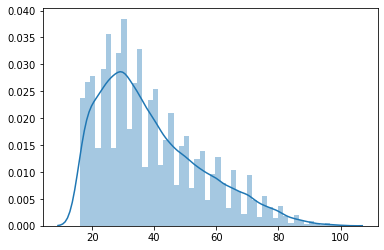

In [71]:
# you can also plot a density plot that smooths the histogram so that you can view the probability distribution better
sns.distplot(newdf[["Respondent Age"]])

In [44]:
# Get the Value Counts for all the Non Numeric coulmns
for i in [i if i not in newdf.columns else "" for i in financial.columns ]:
    if i != "" and i != "uniqueid" :
        #sns.boxplot(x = financial[i])
        print("#"*100)
        print(pd.DataFrame(financial[i].value_counts()))
        
        

####################################################################################################
          country
Rwanda       8735
Tanzania     6606
Kenya        6068
Uganda       2101
####################################################################################################
     Has a Bank account
No                20179
Yes                3309
####################################################################################################
       Type of Location
Rural             14338
Urban              9171
####################################################################################################
     Cell Phone Access
Yes              17449
No                6064
####################################################################################################
        gender_of_respondent
Female                 13859
Male                    9631
####################################################################################################
    

## 4.2 Bivariate Analysis

                           year  household_size  Respondent Age
Has a Bank account                                             
No                  2016.938996        3.704922       38.680115
Yes                 2017.222726        3.559589       39.601633


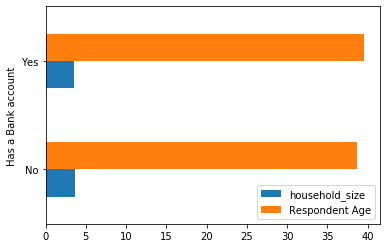

In [53]:
# consider comparing Two  columns and the Bank account
print(financial.groupby("Has a Bank account").mean() )# will bring just for the numeric columns

financial.groupby("Has a Bank account").mean()[["household_size","Respondent Age"]].plot(kind = "barh") # not much difference


# <font color = "yellow">Hypothesis test</font>

Statistcal question: does age matter in the choice of having or opening a bank account

ho  there is no difference in the ages of people with bank accounts

h1  there is a difference in the ages of people with bank accounts



In [20]:
from scipy import stats

financial = financial.dropna()
#print(financial.isna().sum())
yes = financial["Has a Bank account"] =="Yes"
yes=financial[yes]['Respondent Age']

no= financial["Has a Bank account"] =="No"
no=financial[no]['Respondent Age']

stats.ttest_ind(yes,no)


Ttest_indResult(statistic=3.00184548158464, pvalue=0.002686321541924604)

 ## \alpha = 0.05 # 95 % confidence level

##  since p-value < \alpha ,
## Conclusion - reject Ho at 95% confidence level and conclude that there is a difference in the ages of people with accounts and those that dont have accounts

## 4.3 Multivariate Analysis

<Figure size 1440x1440 with 0 Axes>

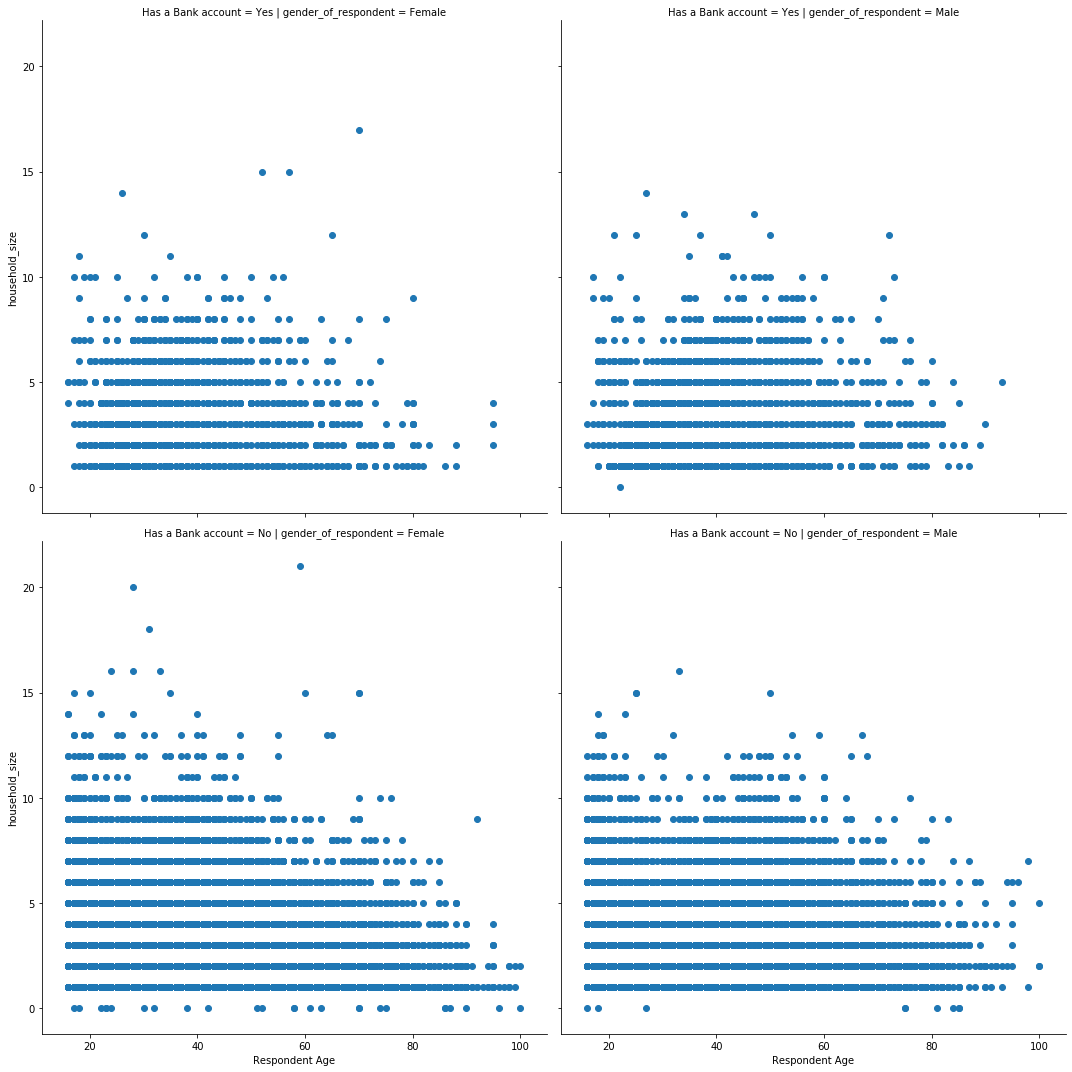

In [50]:

#pd.pivot_table(financial,index = ["Has a Bank account"],fill_value=0,aggfunc=[moder])

#financial.groupby("Has a Bank account").count()
plt.figure(figsize =(20,20))
g = sns.FacetGrid(financial, col="gender_of_respondent",  row="Has a Bank account")
g.fig.set_size_inches(15,15)
g.map(plt.scatter ,"Respondent Age","household_size")

# use up to four variables to visualize your data  ---  etc


# 5. Conclusion and Next Steps

# <font color = "cyan"> Machine Learning ( Classification through Logistic Regression) </font>

In [59]:
# predictions
financial.head()
#subset the data for further analysis
useful  = ['household_size', 'Respondent Age','Has a Bank account']
df = financial[useful]

# ensure no null are there
print("#" * 100)
print(df.shape)
df = df.dropna() # dropped like 30 of them so no big difference
print(df.shape)
print("#" * 100)
# split the data into training and testing

X = df[['household_size', 'Respondent Age']]
Y = df['Has a Bank account']

# split the data for prediction
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

# create the machine learning prediction
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

#test how well the model performed using accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

pred = model.predict(x_test)
ac = accuracy_score(pred,y_test)
conf = confusion_matrix(pred,y_test)
print("#" * 100)
print("accuracy score is: {}".format(ac))
print("#" * 100)
print(pd.DataFrame(conf,index = ["yes","no"],columns = ["yes","no"])) # not a good model at all but useful as a baseline

####################################################################################################
(23524, 3)
(23435, 3)
####################################################################################################
####################################################################################################
accuracy score is: 0.8527842969916791
####################################################################################################
      yes   no
yes  3997  690
no      0    0


C:\Users\Maria\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# "Rough Work"

In [138]:
rship = financial.loc[financial['rship_w_head'].isna() == True]
rship.isna().sum()

country              0
year                 0
unique_id            0
bank_account         0
location_type        0
cell_phone_access    0
household_size       4
respondent_age       4
respondent_gender    4
rship_w_head         4
marital_status       4
education_level      0
job_type             0
dtype: int64

In [47]:
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [32]:
financial.job_type.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

In [36]:
financial.loc[financial.job_type.isna() == True]

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
13461,Rwanda,2016,uniqueid_7394,No,Rural,No,1.0,74.0,Male,Head of Household,Divorced/Seperated,NaN,NaN
13462,Rwanda,2016,uniqueid_7395,No,Rural,Yes,4.0,31.0,Female,Head of Household,Divorced/Seperated,NaN,NaN
13463,Rwanda,2016,uniqueid_7396,No,Rural,Yes,3.0,53.0,Female,Head of Household,Divorced/Seperated,NaN,NaN
13464,Rwanda,2016,uniqueid_7397,No,Rural,Yes,5.0,63.0,Male,Head of Household,Married/Living together,NaN,NaN
13465,Rwanda,2016,uniqueid_7398,No,Urban,Yes,3.0,49.0,Female,Head of Household,Widowed,NaN,NaN
13466,Rwanda,2016,uniqueid_7399,Yes,Rural,Yes,9.0,NaN,Female,Head of Household,Widowed,NaN,NaN
13467,Rwanda,2016,uniqueid_7400,No,Rural,Yes,3.0,NaN,Male,Head of Household,Married/Living together,NaN,NaN
13468,Rwanda,2016,uniqueid_7401,No,Rural,Yes,3.0,NaN,Female,Spouse,Married/Living together,NaN,NaN
13469,Rwanda,2016,uniqueid_7402,No,Rural,Yes,2.0,NaN,Female,Head of Household,Widowed,NaN,NaN
13470,Rwanda,2016,uniqueid_7403,No,Rural,Yes,3.0,30.0,Male,Head of Household,Married/Living together,NaN,NaN


In [28]:
financial.loc[financial.education_level == 'Other/Dont know/RTA']

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
693,Kenya,2018,uniqueid_694,No,Rural,No,6.0,88.0,Male,Head of Household,Married/Living together,Other/Dont know/RTA,Other Income
1186,Kenya,2018,uniqueid_1187,Yes,Urban,Yes,1.0,48.0,Female,Head of Household,Married/Living together,Other/Dont know/RTA,Formally employed Government
1924,Kenya,2018,uniqueid_1925,Yes,Urban,Yes,5.0,31.0,Female,Child,Single/Never Married,Other/Dont know/RTA,Formally employed Government
2438,Kenya,2018,uniqueid_2439,Yes,Urban,Yes,3.0,71.0,Male,Head of Household,Married/Living together,Other/Dont know/RTA,Other Income
3402,Kenya,2018,uniqueid_3403,Yes,Urban,Yes,3.0,46.0,Female,Spouse,Married/Living together,Other/Dont know/RTA,Formally employed Private
4204,Kenya,2018,uniqueid_4205,Yes,Rural,Yes,4.0,47.0,Male,Head of Household,Married/Living together,Other/Dont know/RTA,Self employed
5030,Kenya,2018,uniqueid_5031,Yes,Urban,Yes,1.0,26.0,Female,Head of Household,Single/Never Married,Other/Dont know/RTA,Self employed


In [52]:
# let's look at the records that have '6' as their education level
education6 = financial.loc[financial.education_level == '6']

#education6.describe(include='all')
## 27 records
## 3 unique countries - 18 Rwanda, 6 Uganda, 3 Tanzania
## bank account - 22 No, 5 Yes
## location type - 16 Rural, 11 Urban
## cell phone access -16 Yes, 11 No 
## household size value counts - 7 size2, 5 size1, 5 size6, 3 size3, 2 size4, 2 size5, 1 size12, 1 size7, 1 size8
## mean household size - 3.8148
## mode household size -2
## mean and mode respondent age - mean 50.4818 and mode 48 & 80
## respondent age value counts - 3 80yrs, 3 48yrs, 2 63 yrs, the rest just once
## respondent gender mode - Female
## relationship with head mode - 15 head of household, 11 spouse, 1 other relative
## marital status mode - 16 married, 6 widowed, 3 single, 2 divorced
## job type mode - 15 Informally employed, 4 self employed, 3 no income, 2 remittance dependent, rest are 1 each

In [68]:
education6.loc[(education6['country'] == 'Rwanda') & (education6['bank_account'] == 'No') & (education6['education_level'] == '6') ]


,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
6867,Rwanda,2016,uniqueid_800,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,uniqueid_1870,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,uniqueid_2159,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,uniqueid_2386,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,uniqueid_2711,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9878,Rwanda,2016,uniqueid_3811,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
10560,Rwanda,2016,uniqueid_4493,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,uniqueid_4700,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
10944,Rwanda,2016,uniqueid_4877,No,Rural,No,2.0,85.0,Male,Head of Household,Married/Living together,6,Informally employed
12358,Rwanda,2016,uniqueid_6291,No,Rural,No,5.0,57.0,Female,Spouse,Married/Living together,6,Informally employed


In [60]:
education6['respondent_age'].value_counts()

80.0    3
48.0    3
63.0    2
60.0    1
18.0    1
31.0    1
36.0    1
44.0    1
70.0    1
38.0    1
85.0    1
57.0    1
35.0    1
65.0    1
43.0    1
69.0    1
71.0    1
23.0    1
24.0    1
30.0    1
20.0    1
34.0    1
Name: respondent_age, dtype: int64

In [25]:
financial.loc[financial.marital_status == 'Dont know']

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
1156,Kenya,2018,uniqueid_1157,No,Rural,Yes,1.0,50.0,Male,Head of Household,Dont know,Primary education,Informally employed
2262,Kenya,2018,uniqueid_2263,No,Urban,Yes,1.0,77.0,Male,Head of Household,Dont know,Primary education,Remittance Dependent
2609,Kenya,2018,uniqueid_2610,Yes,Urban,Yes,2.0,34.0,Male,Head of Household,Dont know,Secondary education,Formally employed Private
2781,Kenya,2018,uniqueid_2782,No,Rural,Yes,4.0,35.0,Male,Child,Dont know,No formal education,Farming and Fishing
2981,Kenya,2018,uniqueid_2982,No,Urban,No,1.0,58.0,Male,Head of Household,Dont know,Primary education,Informally employed
4778,Kenya,2018,uniqueid_4779,No,Rural,Yes,3.0,25.0,Male,Other relative,Dont know,Primary education,Self employed
5033,Kenya,2018,uniqueid_5034,Yes,Urban,Yes,1.0,33.0,Male,Head of Household,Dont know,Primary education,Self employed
5295,Kenya,2018,uniqueid_5296,No,Urban,Yes,8.0,36.0,Female,Head of Household,Dont know,Primary education,Informally employed


In [19]:
financial.loc[financial.household_size == 0]

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
15171,Tanzania,2017,uniqueid_369,No,Urban,Yes,0.0,30.0,Female,Head of Household,Married/Living together,Primary education,No Income
15897,Tanzania,2017,uniqueid_1095,No,Urban,Yes,0.0,24.0,Female,Head of Household,Single/Never Married,Primary education,Remittance Dependent
15918,Tanzania,2017,uniqueid_1116,No,Rural,No,0.0,27.0,Male,Parent,Divorced/Seperated,Secondary education,No Income
16006,Tanzania,2017,uniqueid_1204,No,Rural,Yes,0.0,22.0,Female,Head of Household,Divorced/Seperated,Tertiary education,Remittance Dependent
16132,Tanzania,2017,uniqueid_1330,No,Rural,No,0.0,18.0,Female,Other relative,Divorced/Seperated,Secondary education,Remittance Dependent
16137,Tanzania,2017,uniqueid_1335,No,Urban,Yes,0.0,23.0,Female,Head of Household,Divorced/Seperated,Primary education,No Income
16509,Tanzania,2017,uniqueid_1707,No,Urban,Yes,0.0,23.0,Female,Parent,Divorced/Seperated,Tertiary education,No Income
16561,Tanzania,2017,uniqueid_1759,No,Urban,No,0.0,87.0,Female,Head of Household,Widowed,No formal education,No Income
16702,Tanzania,2017,uniqueid_1900,No,Urban,Yes,0.0,32.0,Female,Head of Household,Single/Never Married,Primary education,Remittance Dependent
16987,Tanzania,2017,uniqueid_2185,No,Urban,No,0.0,75.0,Female,Head of Household,Married/Living together,Primary education,No Income
